In [226]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

from scipy import stats
from scipy.stats import norm, skew

from pandas.api.types import CategoricalDtype

In [227]:
df=pd.read_csv(r'C:\Users\doloy\OneDrive\Documents\policeproj\police_killings.csv', encoding = "ISO-8859-1", engine='python')
missingVals = ['Unknown']
df.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [228]:
nominal_features=["gender","raceethnicity","month","streetaddress","state","cause","armed","county_bucket","nat_bucket"]

order_levels = {
    "county_bucket": ['1', '2', '3', '4', '5'],
    "nat_bucket": ['1', '2', '3', '4', '5'],
    "gender": ["Male", "Female"],
    "month": ["January", "February", "March", "April", "May", "June"]
    
}

def encode(df):
    for col in nominal_features:
        df[col]=df[col].astype("category")
        
    for col, order_level in order_levels.items():
        df[col] = df[col].astype(CategoricalDtype(order_level, ordered=True))
        
#     mapper = {"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
#     df["ExterCond"] = df["ExterCond"].replace(mapper)
        
    return df
        
    
df = encode(df) 

In [229]:

df.drop(['name','day','year','streetaddress','city','state_fp','county_fp','tract_ce','geo_id','namelsad','lawenforcementagency','county_id'], axis=1, inplace=True)
df.head()

,age,gender,raceethnicity,month,state,latitude,longitude,cause,armed,pop,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,16,Male,Black,February,AL,32.529577,-86.362829,Gunshot,No,3779,...,5.6,28375,51367.0,54766,0.937936,NaN,NaN,14.1,0.097686,0.168510
1,27,Male,White,April,LA,31.321739,-92.434860,Gunshot,No,2769,...,0.5,14678,27972.0,40930,0.683411,NaN,NaN,28.8,0.065724,0.111402
2,26,Male,White,March,WI,42.583560,-87.835710,Gunshot,No,4079,...,16.8,25286,45365.0,54930,0.825869,NaN,NaN,14.6,0.166293,0.147312
3,25,Male,Hispanic/Latino,March,CA,33.939298,-118.219463,Gunshot,Firearm,4343,...,98.8,17194,48295.0,55909,0.863814,NaN,NaN,11.7,0.124827,0.050133
4,29,Male,White,March,OH,41.148575,-81.429878,Gunshot,No,6809,...,1.7,33954,68785.0,49669,1.384868,NaN,NaN,1.9,0.063550,0.403954


In [230]:
df.shape

(467, 22)

In [231]:
df.columns

Index(['age', 'gender', 'raceethnicity', 'month', 'state', 'latitude',
       'longitude', 'cause', 'armed', 'pop', 'share_white', 'share_black',
       'share_hispanic', 'p_income', 'h_income', 'county_income',
       'comp_income', 'county_bucket', 'nat_bucket', 'pov', 'urate',
       'college'],
      dtype='object')

In [232]:
# Column Deletions:
#     -Year(its all 2015)

In [233]:
df.describe()

,latitude,longitude,pop,h_income,county_income,comp_income,urate,college
count,467.000000,467.000000,467.000000,465.000000,467.000000,465.000000,465.000000,465.000000
mean,36.403224,-96.972666,4783.719486,46627.182796,52527.331906,0.895913,0.117399,0.220217
std,5.193357,16.953842,2374.565749,20511.194907,12948.263811,0.333584,0.069175,0.158347
min,19.915194,-159.642700,0.000000,10290.000000,22545.000000,0.184049,0.011335,0.013547
25%,33.335240,-111.954636,3357.500000,32625.000000,43804.000000,0.645365,0.068592,0.106167
50%,35.769779,-94.761902,4447.000000,42759.000000,50856.000000,0.869612,0.105181,0.169544
75%,39.937452,-82.961582,5815.500000,56190.000000,56832.000000,1.081454,0.140833,0.284542
max,61.218408,-68.100007,26826.000000,142500.000000,110292.000000,2.865216,0.507614,0.828070


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             467 non-null    object  
 1   gender          467 non-null    category
 2   raceethnicity   467 non-null    category
 3   month           467 non-null    category
 4   state           467 non-null    category
 5   latitude        467 non-null    float64 
 6   longitude       467 non-null    float64 
 7   cause           467 non-null    category
 8   armed           467 non-null    category
 9   pop             467 non-null    int64   
 10  share_white     467 non-null    object  
 11  share_black     467 non-null    object  
 12  share_hispanic  467 non-null    object  
 13  p_income        467 non-null    object  
 14  h_income        465 non-null    float64 
 15  county_income   467 non-null    int64   
 16  comp_income     465 non-null    float64 
 17  county_bucket   

In [235]:
df.drop(['p_income', 'county_bucket'], axis=1, inplace=True)
#Dropped the personal income and household income quintile within county,
#because we are just going to use household_income and household income quintile within the nation
df.head()

,age,gender,raceethnicity,month,state,latitude,longitude,cause,armed,pop,share_white,share_black,share_hispanic,h_income,county_income,comp_income,nat_bucket,pov,urate,college
0,16,Male,Black,February,AL,32.529577,-86.362829,Gunshot,No,3779,60.5,30.5,5.6,51367.0,54766,0.937936,NaN,14.1,0.097686,0.168510
1,27,Male,White,April,LA,31.321739,-92.434860,Gunshot,No,2769,53.8,36.2,0.5,27972.0,40930,0.683411,NaN,28.8,0.065724,0.111402
2,26,Male,White,March,WI,42.583560,-87.835710,Gunshot,No,4079,73.8,7.7,16.8,45365.0,54930,0.825869,NaN,14.6,0.166293,0.147312
3,25,Male,Hispanic/Latino,March,CA,33.939298,-118.219463,Gunshot,Firearm,4343,1.2,0.6,98.8,48295.0,55909,0.863814,NaN,11.7,0.124827,0.050133
4,29,Male,White,March,OH,41.148575,-81.429878,Gunshot,No,6809,92.5,1.4,1.7,68785.0,49669,1.384868,NaN,1.9,0.063550,0.403954


In [236]:
df.isnull().sum()

age                 0
gender              0
raceethnicity       0
month               0
state               0
latitude            0
longitude           0
cause               0
armed               0
pop                 0
share_white         0
share_black         0
share_hispanic      0
h_income            2
county_income       0
comp_income         2
nat_bucket        467
pov                 0
urate               2
college             2
dtype: int64

In [237]:
#*NEEDS WORK*
#Delete all rows that are "Unkown", "-" and maybe delete or fill the NA and 0
df = df[df.age != "Unknown"]
# df = df[df.p_income != "Unknown"]
# df = df[df.p_income != "-"]

In [238]:
#Convert objects to int and float
df["age"] = df["age"].astype(str).astype(int)
# df["p_income"] = df["p_income"].astype(str).astype(float)

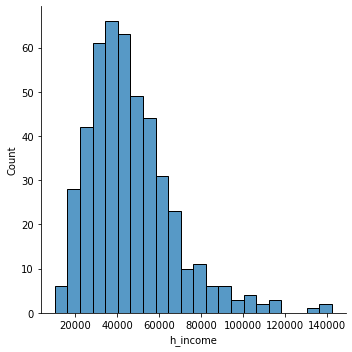

In [239]:
#The distribution for the household incomes of the data is skewed to the left and shows
#high counts for the incomes under $70,000 and peaks between $30,000-$40,000
sns.displot(df.h_income)
plt.show()

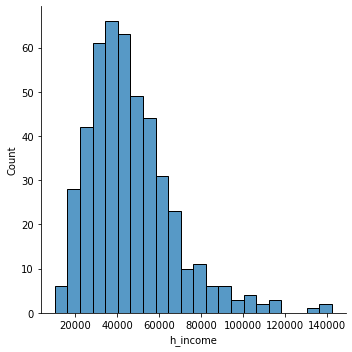

In [240]:
#Mostly distrubted 0 to 60000
sns.displot(df[df.h_income<155000].h_income)
plt.show()

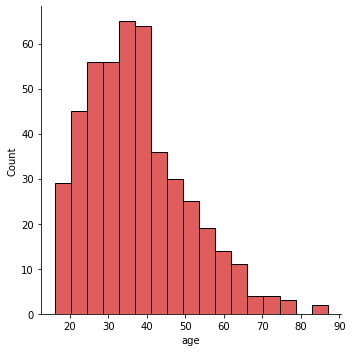

In [241]:
#Rates of killings shows a steady increase to peak 30-40 ages and drastically drops 
#with a steady declines of the ages that follow
sns.displot(df.age, color="tab:red")
plt.show()

In [242]:
# sns.displot(df.p_income)
# plt.show()

In [243]:
df.month.unique()

['February', 'April', 'March', 'January', 'May', 'June']
Categories (6, object): ['January' < 'February' < 'March' < 'April' < 'May' < 'June']

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

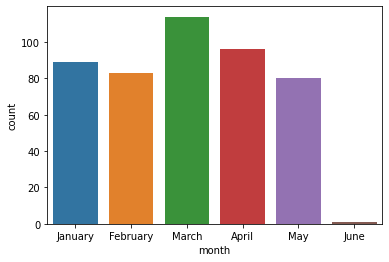

In [244]:
#Data only shows from months Jan-June but June has only two days worth of data which makes
#sense as to why count is low. March has the highest count in the first half of the year
sns.countplot(df.month)

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='armed', ylabel='count'>

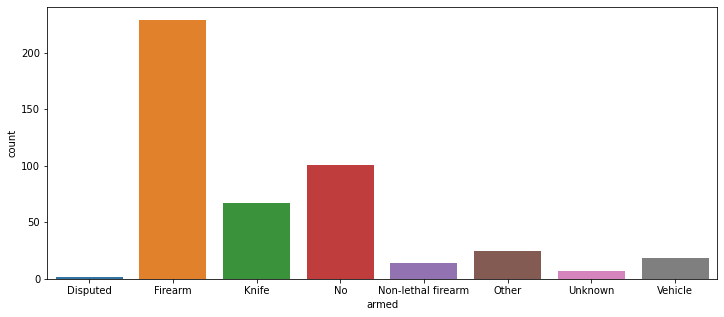

In [245]:
#Firearm as expected has the highest rate but unarmed is surprisingly second 
plt.figure(figsize=(12,5))
sns.countplot(df.armed)

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cause', ylabel='count'>

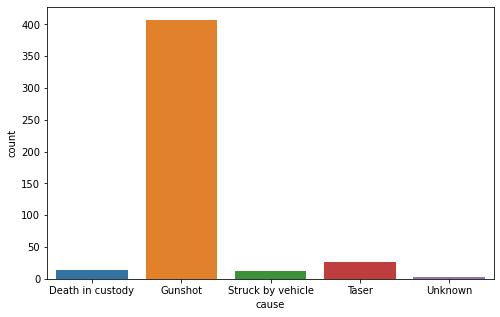

In [246]:
#Gunshots are the leading causes of death by far across all and makes sense beacause firearms have the highest rates for armed indivisuals
plt.figure(figsize=(8,5))
sns.countplot(df.cause)

In [247]:
df.state.unique()

['AL', 'LA', 'WI', 'CA', 'OH', ..., 'AK', 'MN', 'ME', 'DE', 'WY']
Length: 47
Categories (47, object): ['AL', 'LA', 'WI', 'CA', ..., 'MN', 'ME', 'DE', 'WY']

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

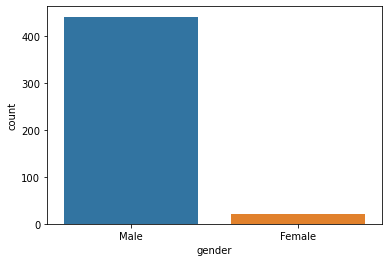

In [248]:
#Males have a much higher rate of deaths with police. Population is fairly equal with both genders.
sns.countplot(df.gender)

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='raceethnicity', ylabel='count'>

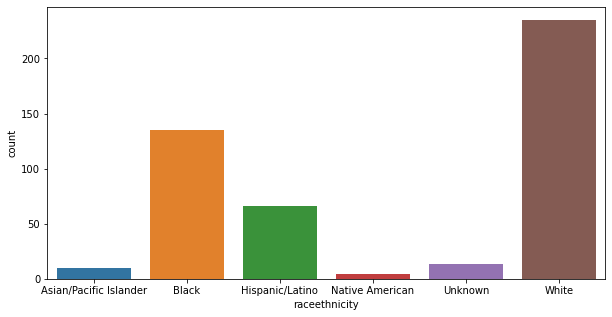

In [249]:
plt.figure(figsize=(10,5))
sns.countplot(df.raceethnicity)

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

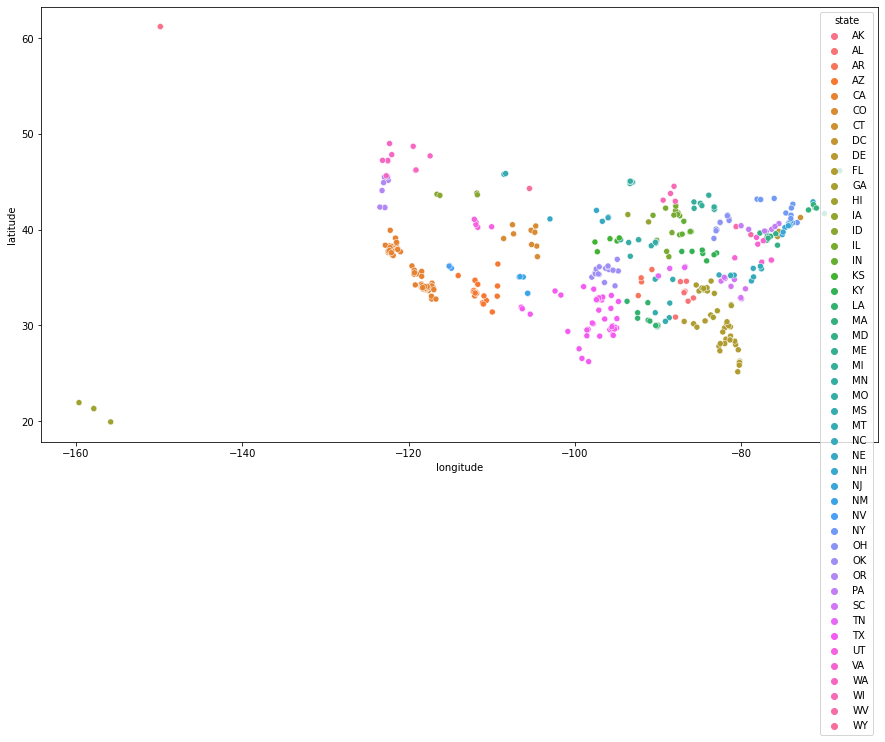

In [250]:
plt.figure(figsize=(15,8))
sns.scatterplot(df.longitude, df.latitude, hue=df.state)

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

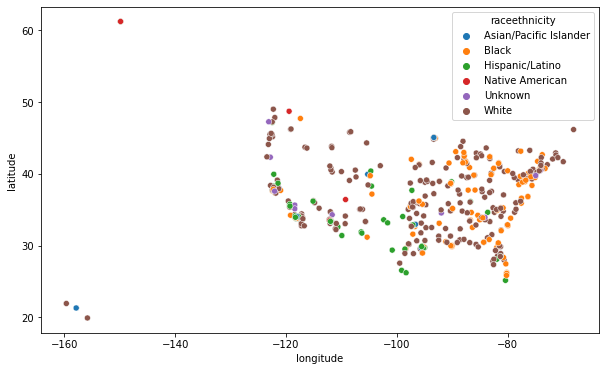

In [251]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude, df.latitude, hue=df.raceethnicity)

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

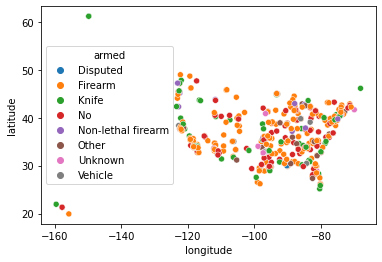

In [252]:
# plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude, df.latitude, hue=df.armed)

C:\Users\doloy\anaconda3\envs\seaversioneleven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

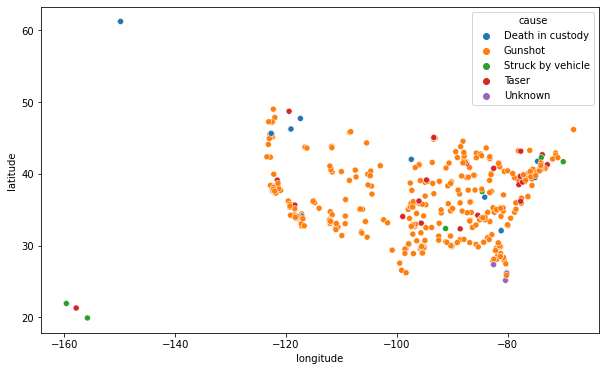

In [253]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude, df.latitude, hue=df.cause)

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 466
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             463 non-null    int32   
 1   gender          463 non-null    category
 2   raceethnicity   463 non-null    category
 3   month           463 non-null    category
 4   state           463 non-null    category
 5   latitude        463 non-null    float64 
 6   longitude       463 non-null    float64 
 7   cause           463 non-null    category
 8   armed           463 non-null    category
 9   pop             463 non-null    int64   
 10  share_white     463 non-null    object  
 11  share_black     463 non-null    object  
 12  share_hispanic  463 non-null    object  
 13  h_income        461 non-null    float64 
 14  county_income   463 non-null    int64   
 15  comp_income     461 non-null    float64 
 16  nat_bucket      0 non-null      category
 17  pov             

In [255]:
df.isnull().sum()

age                 0
gender              0
raceethnicity       0
month               0
state               0
latitude            0
longitude           0
cause               0
armed               0
pop                 0
share_white         0
share_black         0
share_hispanic      0
h_income            2
county_income       0
comp_income         2
nat_bucket        463
pov                 0
urate               2
college             2
dtype: int64

In [256]:
#df.fillna({'county_bucket': 0}, inplace=True)

In [257]:
df.isnull().sum()

age                 0
gender              0
raceethnicity       0
month               0
state               0
latitude            0
longitude           0
cause               0
armed               0
pop                 0
share_white         0
share_black         0
share_hispanic      0
h_income            2
county_income       0
comp_income         2
nat_bucket        463
pov                 0
urate               2
college             2
dtype: int64

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 466
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             463 non-null    int32   
 1   gender          463 non-null    category
 2   raceethnicity   463 non-null    category
 3   month           463 non-null    category
 4   state           463 non-null    category
 5   latitude        463 non-null    float64 
 6   longitude       463 non-null    float64 
 7   cause           463 non-null    category
 8   armed           463 non-null    category
 9   pop             463 non-null    int64   
 10  share_white     463 non-null    object  
 11  share_black     463 non-null    object  
 12  share_hispanic  463 non-null    object  
 13  h_income        461 non-null    float64 
 14  county_income   463 non-null    int64   
 15  comp_income     461 non-null    float64 
 16  nat_bucket      0 non-null      category
 17  pov             

In [259]:
df['gender']=df['gender'].astype('category').cat.codes
df['raceethnicity']=df['raceethnicity'].astype('category').cat.codes
df['month']=df['month'].astype('category').cat.codes
df['state']=df['state'].astype('category').cat.codes
df['cause']=df['cause'].astype('category').cat.codes
df['armed']=df['armed'].astype('category').cat.codes

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 466
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             463 non-null    int32   
 1   gender          463 non-null    int8    
 2   raceethnicity   463 non-null    int8    
 3   month           463 non-null    int8    
 4   state           463 non-null    int8    
 5   latitude        463 non-null    float64 
 6   longitude       463 non-null    float64 
 7   cause           463 non-null    int8    
 8   armed           463 non-null    int8    
 9   pop             463 non-null    int64   
 10  share_white     463 non-null    object  
 11  share_black     463 non-null    object  
 12  share_hispanic  463 non-null    object  
 13  h_income        461 non-null    float64 
 14  county_income   463 non-null    int64   
 15  comp_income     461 non-null    float64 
 16  nat_bucket      0 non-null      category
 17  pov             

<AxesSubplot:>

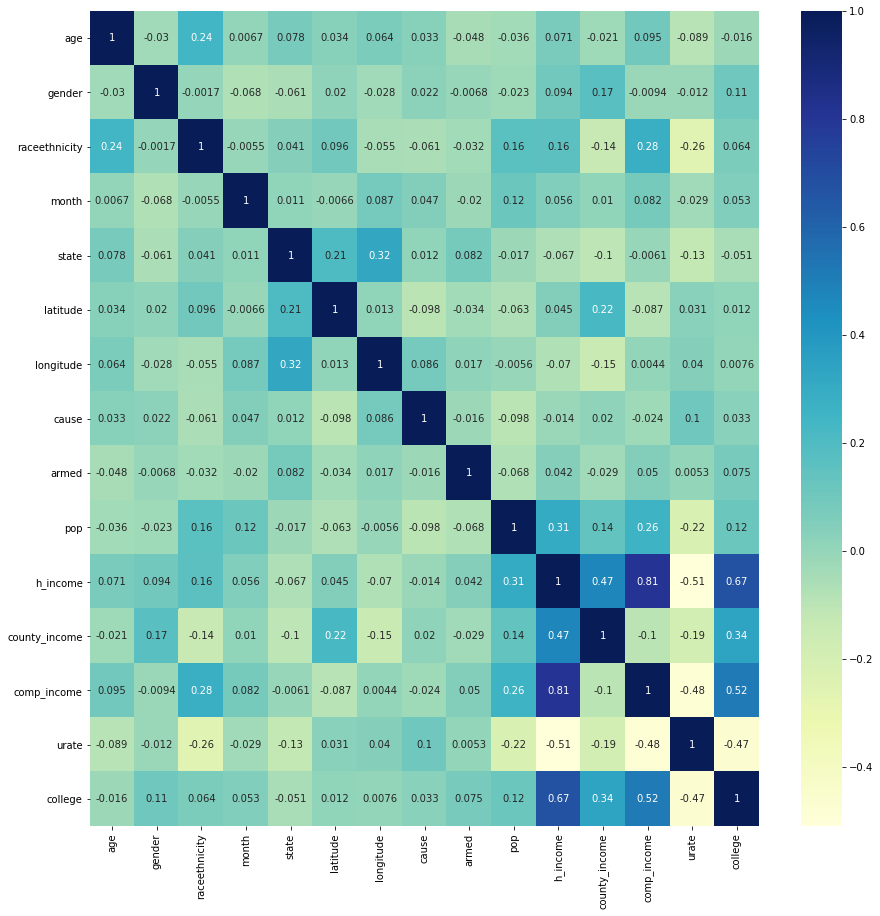

In [261]:
plt.figure(figsize=(15,15))
correlation=df.corr()
sns.heatmap(correlation,cmap='YlGnBu',annot=True)